<a href="https://colab.research.google.com/github/mipt-alexa/computational-math-course/blob/main/10_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Решить уравнение $\frac{d^2 y}{dt^2}= 2t + 3y$ на отрезке [0,10]

$y_1' = y_2$

$y_2' = 2t+3y_1$

In [2]:
def f1(y, t):
    return np.array([y[1], 2* t + 5*y[0]])

In [3]:
def euler(f, y, t, tau):
    return y + tau*f(y, t)

In [4]:
def midpoint(f, y, t, tau):
    k1 = f(y, t)
    k2 = f(y + tau/2*k1, t + tau/2)
    return y + tau * k2

In [5]:
def rk4(f, y, t, tau):
    k1 = f(y, t)
    k2 = f(y + tau/2*k1, t + tau/2)
    k3 = f(y + tau/2*k2, t + tau/2)
    k4 = f(y + tau *k3, t + tau)
    return y + tau * (k1 + 2*k2 + 2*k3 + k4) / 6

In [6]:
def calculate(method, f, y0, tau, T):
    t = T[0]
    y = y0
    Y = np.array([])
    V = np.array([])

    t_space = np.arange(T[0], T[1], tau)

    for t in t_space:
        Y = np.append(Y, y[0])
        V = np.append(V, y[1])
        y = method(f, y, t, tau)

    return t_space, Y, V


In [7]:
def plot(method, f, tau, T):
    v0 = 5 * np.sqrt(3) * np.sinh(np.sinh(3)/2)

    t, y, v = calculate(method, f, np.array([0, v0]), tau, T)

    fig, (a1, a2) = plt.subplots(1,2)
    a1.plot(t,y)
    a2.plot(y, v)
    plt.show()

Графики y(t) и y(y'). Точное решение $c_1 e^{\sqrt{3}t} + c_2 e^{-\sqrt{3}t} - \frac{2t}{3}$

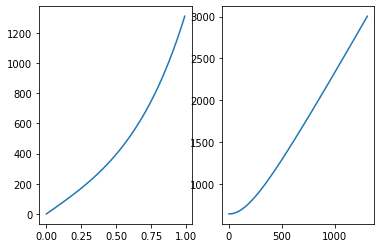

In [8]:
plot(rk4, f1, 0.01, [0,1])